In [5]:
# Essential libraries for data manipulation, visualization, and analysis
import pandas as pd  # Data handling with DataFrames
import numpy as np  # Numerical operations
# Visualization libraries
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns  # Advanced statistical plots
# Machine learning preprocessing and metrics
from sklearn.preprocessing import RobustScaler  # Scaling robust to outliers
from sklearn.metrics import silhouette_score  # Clustering quality evaluation
# Machine learning models
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.cluster import KMeans  # K-Means clustering
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('movies.csv') # Load the dataset into a pandas DataFrame

In [7]:
data.head()  # Displays the first 5 rows of the dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
data.isna().sum() # Check for missing values in your DataFrame

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
data=data.dropna()  # droping null values

In [11]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [12]:
numeric_columns.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [13]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
year,2.001661e+03,2002.0,1.054091e+01,-0.193935,-1.010758
score,6.392455e+00,6.5,9.627300e-01,-0.633419,1.130810
votes,1.150661e+05,52000.0,1.844073e+05,4.333050,28.861573
budget,3.600917e+07,21800000.0,4.157337e+07,2.443381,7.424522
gross,1.032297e+08,36869414.0,1.873027e+08,4.668121,35.315506
runtime,1.081527e+02,105.0,1.811570e+01,1.425262,4.581294


In [14]:
def draw_bar_chart(df):
    """
    Generates a bar chart for a given column in the dataset.
    """
    counts = df['genre'].value_counts()  # Count occurrences of each genre
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts.index, y=counts.values, hue=counts,palette="coolwarm")
    plt.title("bar plot of genres", fontsize=14)
    plt.xlabel("genres", fontsize=12)
    plt.ylabel("Number of Films", fontsize=12)
    plt.xticks(rotation=45, ha="right")  # Rotate for better readability
    plt.tight_layout()
    plt.show()

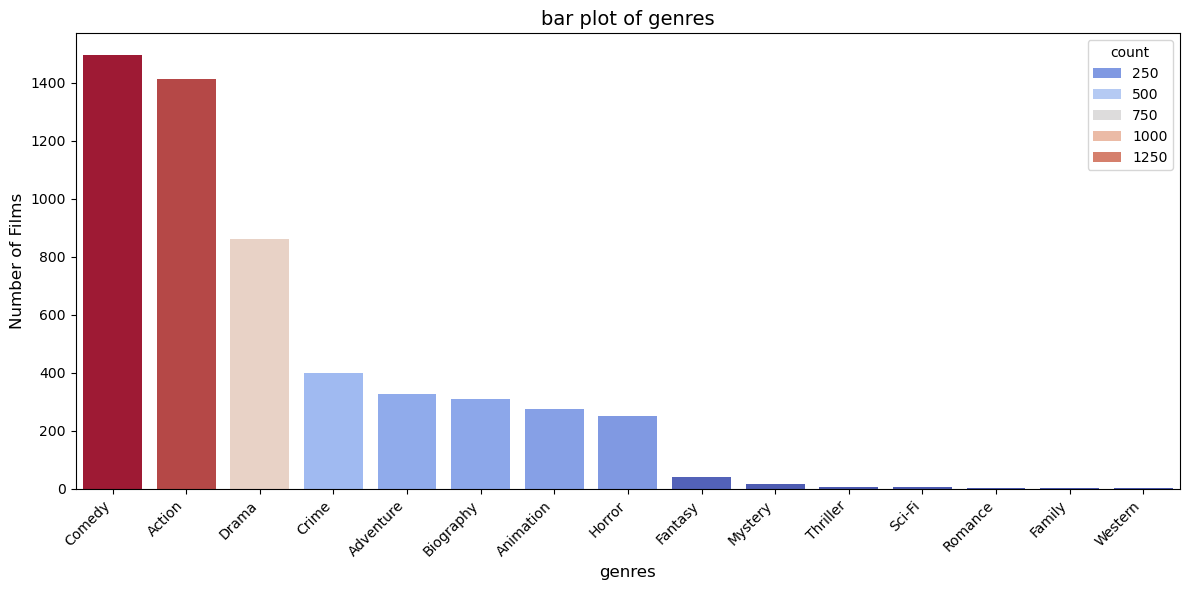

In [17]:
draw_bar_chart(data)

In [24]:
def draw_corr_heatmap(df):
    """
    Generates a correlation heatmap for numerical columns in the dataset.
    """
    plt.figure(figsize=(9, 7), dpi=150)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

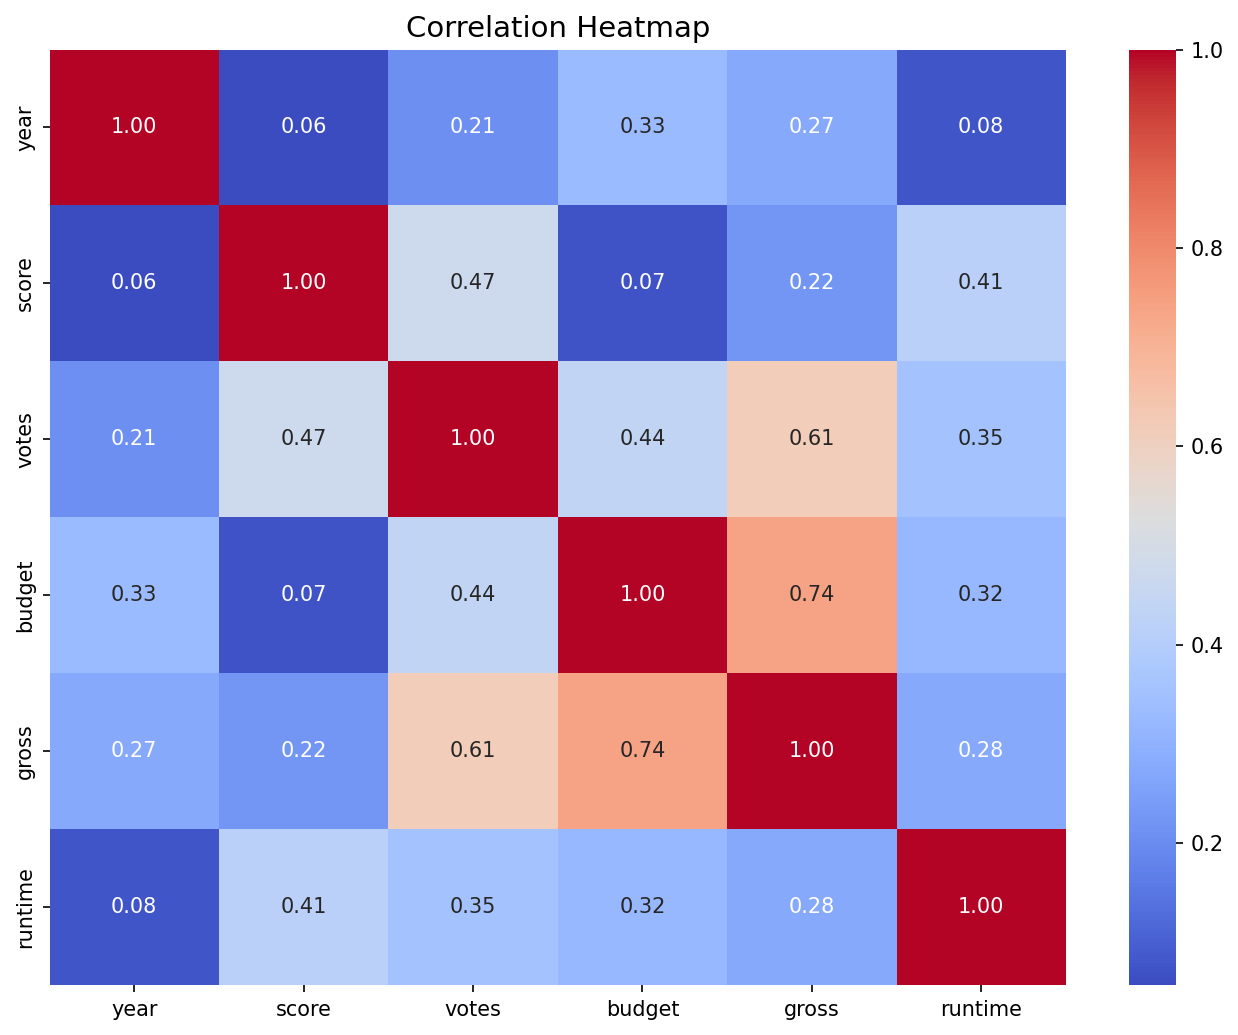

In [27]:
draw_corr_heatmap(numeric_columns)

In [48]:
def draw_scatter_plot(df, x_col, y_col):
    """
    Generates a scatter plot with the x_col on the x-axis and y_col on the y-axis.
    
    df : DataFrame : The dataset containing the data
    x_col : str : Column name for the x-axis
    y_col : str : Column name for the y-axis
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], color='red')
    plt.title(f'Scatter Plot of {y_col} vs {x_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

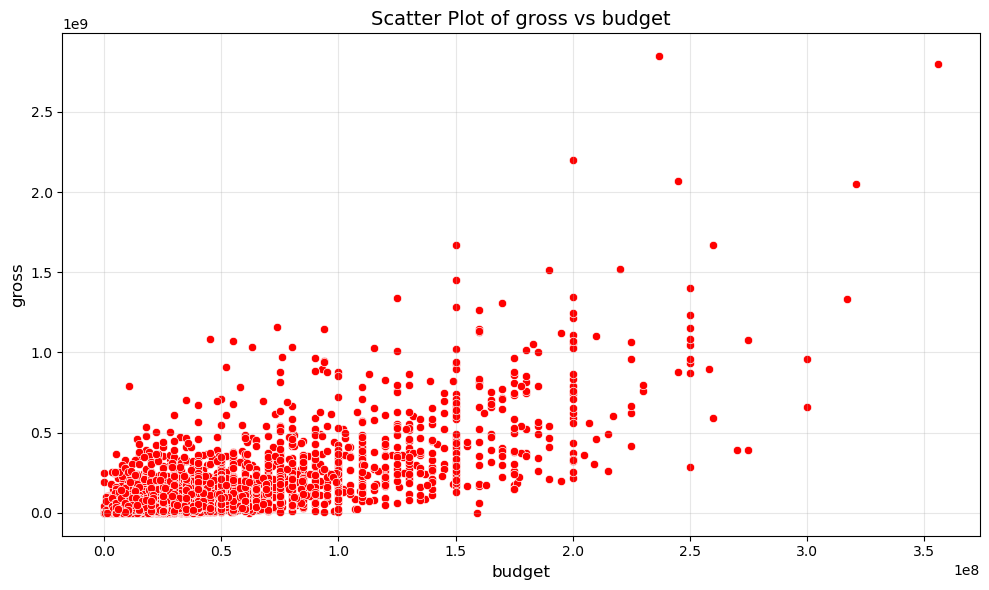

In [50]:
draw_scatter_plot(data, 'budget', 'gross')

In [52]:
data_for_clustering = data[['budget', 'gross']].copy()

# Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [54]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia

# Step 3: Compute WCSS and silhouette scores
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")

2 clusters silhouette score = 0.77
3 clusters silhouette score = 0.66
4 clusters silhouette score = 0.56
5 clusters silhouette score = 0.55
6 clusters silhouette score = 0.52
7 clusters silhouette score = 0.51
8 clusters silhouette score = 0.45
9 clusters silhouette score = 0.45
10 clusters silhouette score = 0.45
Optimal number of clusters = 2


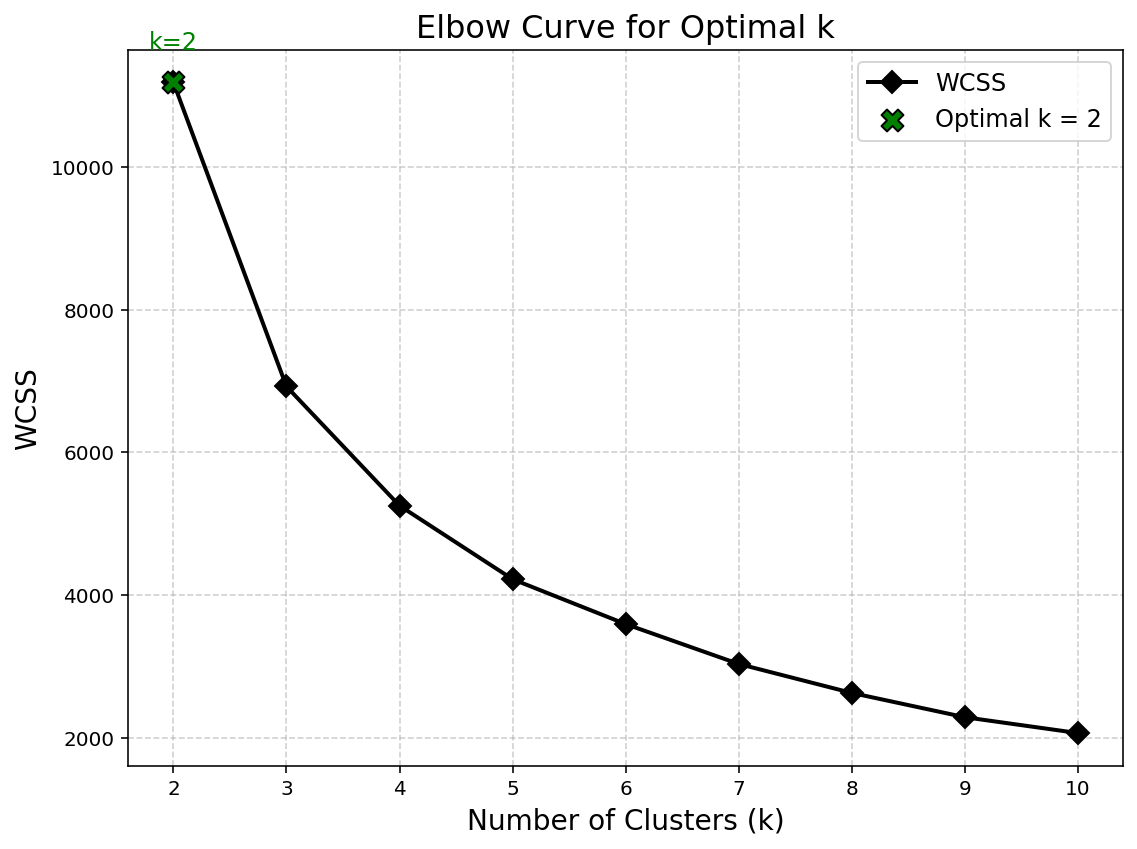

In [60]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    """
    Plots the elbow curve to determine the best number of clusters (k).
    """
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot WCSS values with blue line and diamond markers
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='D', color='black', label='WCSS', markersize=8, linewidth=2)
    
    # Mark the optimal number of clusters with green cross
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='green', edgecolor='black', s=120, zorder=5, marker='X', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(
        f'k={optimal_clusters}',
        xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
        xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
        fontsize=12,
        color='green',
        ha='center'
    )
    
    # Customize plot
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Step 4: Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)

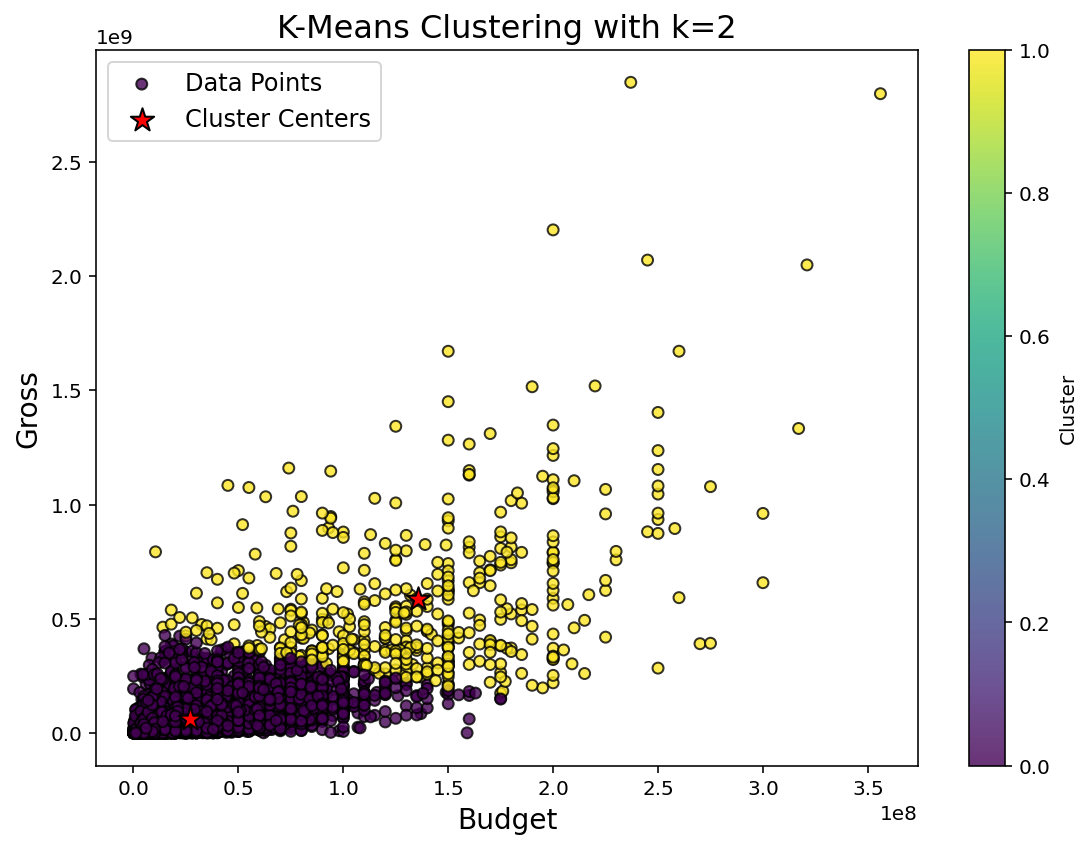

In [62]:
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (RobustScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        
        # Scatter plot with clusters
        plt.figure(figsize=(8, 6), dpi=144)
        scatter = plt.scatter(
            original_data[:, 0], original_data[:, 1], 
            c=labels, cmap='viridis', s=30, alpha=0.8, edgecolors='k', label='Data Points'
        )
        plt.scatter(
            x_centers, y_centers, 
            color='red', s=150, marker='*', edgecolor='black', label='Cluster Centers'
        )
        plt.title(f'K-Means Clustering with k={k}', fontsize=16)
        plt.xlabel('Budget', fontsize=14)
        plt.ylabel('Gross', fontsize=14)
        plt.legend(fontsize=12)
        plt.colorbar(scatter, label='Cluster')
        plt.tight_layout()
        plt.show()

# Inverse normalization for accurate plotting of the original data
inverse_norm = scaler.inverse_transform(scaled_data)

# Step 5: Perform clustering for the optimal k
perform_kmeans_clustering(inverse_norm, scaled_data, scaler, cluster_range=[optimal_cluster_count])